# ***Evostra Intership Group project: Team D***

STEP 1: FETCH RAW DATASET

In [ ]:
import requests
import time
import pandas as pd
from pathlib import Path

Path("data/raw").mkdir(parents=True, exist_ok=True)


In [ ]:
headers = {
    "User-Agent": "Educational Data Science Internship Project",
    "Accept": "application/json"
}

url = "https://remoteok.com/remote-jobs.json"

response = requests.get(url, headers=headers, timeout=30)
response.raise_for_status()

jobs_json = response.json()

time.sleep(1)

print("JSON feed fetched successfully")
print("Total records received:", len(jobs_json))


JSON feed fetched successfully
Total records received: 99


In [ ]:
jobs_json[0]


{'last_updated': 1767740411,
 'legal': "API Terms of Service: Please link back (with follow, and without nofollow!) to the URL on Remote OK and mention Remote OK as a source, so we get traffic back from your site. If you do not we'll have to suspend API access.\n\nPlease don't use the Remote OK logo without written permission as it's a registered trademark, please DO use our name Remote OK though."}

In [ ]:
raw_jobs = []

for job in jobs_json:
    if "id" not in job:
        continue

    raw_jobs.append({
        "job_title": job.get("position"),
        "company_name": job.get("company"),
        "skills": ", ".join(job.get("tags", [])),
        "location": job.get("location"),
        "job_type": job.get("employment_type"),
        "date_posted": job.get("date"),
        "job_url": job.get("url")
    })

print("Raw jobs collected:", len(raw_jobs))


Raw jobs collected: 98


In [ ]:
raw_jobs = raw_jobs[:500]

raw_df = pd.DataFrame(raw_jobs)
raw_df.to_csv("data/raw/remoteok_raw.csv", index=False)

raw_df.head()


,job_title,company_name,skills,location,job_type,date_posted,job_url
0,Art Director,Digital Media Management,"director, design, training, software, growth, ...",United States,None,2026-01-06T00:02:35+00:00,https://remoteOK.com/remote-jobs/remote-art-di...
1,Lead Omics Workflow Engineer,Axle,"software, assistant, lead, health, healthcare,...",Remote,None,2026-01-06T00:02:28+00:00,https://remoteOK.com/remote-jobs/remote-lead-o...
2,ERP Systems Manager,DISHER,"manager, system, security, training, technical...",Remote,None,2026-01-06T00:02:11+00:00,https://remoteOK.com/remote-jobs/remote-erp-sy...
3,Copy of Senior AI ML Engineer Applied Machine ...,Trase Systems,"senior, engineer",USA,None,2026-01-06T00:02:04+00:00,https://remoteOK.com/remote-jobs/remote-copy-o...
4,Senior Software Engineer Backend Engineering,Trase Systems,"software, senior, engineer, engineering, backend",Remote,None,2026-01-06T00:01:33+00:00,https://remoteOK.com/remote-jobs/remote-senior...


STEP 2: DATA CLEANING AND PROCESSING

In [ ]:
import pandas as pd
from pathlib import Path

Path("data/cleaned").mkdir(parents=True, exist_ok=True)


In [ ]:
df = pd.read_csv("/content/remoteok_raw.csv")

print("Initial rows:", len(df))
df.head()

Initial rows: 98


,job_title,company_name,skills,location,job_type,date_posted,job_url
0,Art Director,Digital Media Management,"director, design, training, software, growth, ...",United States,NaN,2026-01-06T00:02:35+00:00,https://remoteOK.com/remote-jobs/remote-art-di...
1,Lead Omics Workflow Engineer,Axle,"software, assistant, lead, health, healthcare,...",Remote,NaN,2026-01-06T00:02:28+00:00,https://remoteOK.com/remote-jobs/remote-lead-o...
2,ERP Systems Manager,DISHER,"manager, system, security, training, technical...",Remote,NaN,2026-01-06T00:02:11+00:00,https://remoteOK.com/remote-jobs/remote-erp-sy...
3,Copy of Senior AI ML Engineer Applied Machine ...,Trase Systems,"senior, engineer",USA,NaN,2026-01-06T00:02:04+00:00,https://remoteOK.com/remote-jobs/remote-copy-o...
4,Senior Software Engineer Backend Engineering,Trase Systems,"software, senior, engineer, engineering, backend",Remote,NaN,2026-01-06T00:01:33+00:00,https://remoteOK.com/remote-jobs/remote-senior...


In [ ]:
df = df.dropna(subset=["job_title", "company_name", "job_url"])

print("After removing missing values:", len(df))

After removing missing values: 98


In [ ]:
df = df.drop_duplicates(subset=["job_title", "company_name", "job_url"])

print("After removing duplicates:", len(df))

After removing duplicates: 98


In [ ]:
df["job_title"] = df["job_title"].str.lower().str.strip()
df["company_name"] = df["company_name"].str.lower().str.strip()
df["skills"] = df["skills"].astype(str).str.lower().str.strip()
df["location"] = df["location"].astype(str).str.lower().str.strip()
df["job_type"] = df["job_type"].astype(str).str.lower().str.strip()

In [ ]:
df["date_posted"] = pd.to_datetime(df["date_posted"], errors="coerce")

In [ ]:
df.to_csv("data/cleaned/remoteok_jobs_cleaned.csv", index=False)

print("Cleaned dataset saved successfully")
df.head()

Cleaned dataset saved successfully


,job_title,company_name,skills,location,job_type,date_posted,job_url
0,art director,digital media management,"director, design, training, software, growth, ...",united states,nan,2026-01-06 00:02:35+00:00,https://remoteOK.com/remote-jobs/remote-art-di...
1,lead omics workflow engineer,axle,"software, assistant, lead, health, healthcare,...",remote,nan,2026-01-06 00:02:28+00:00,https://remoteOK.com/remote-jobs/remote-lead-o...
2,erp systems manager,disher,"manager, system, security, training, technical...",remote,nan,2026-01-06 00:02:11+00:00,https://remoteOK.com/remote-jobs/remote-erp-sy...
3,copy of senior ai ml engineer applied machine ...,trase systems,"senior, engineer",usa,nan,2026-01-06 00:02:04+00:00,https://remoteOK.com/remote-jobs/remote-copy-o...
4,senior software engineer backend engineering,trase systems,"software, senior, engineer, engineering, backend",remote,nan,2026-01-06 00:01:33+00:00,https://remoteOK.com/remote-jobs/remote-senior...


STEP 3: DATA ANALYSIS

In [ ]:
import pandas as pd

df = pd.read_csv("data/cleaned/remoteok_jobs_cleaned.csv")

print("Rows", len(df))
print("Columns", list(df.columns))

df.head()

Rows 98
Columns ['job_title', 'company_name', 'skills', 'location', 'job_type', 'date_posted', 'job_url']


,job_title,company_name,skills,location,job_type,date_posted,job_url
0,art director,digital media management,"director, design, training, software, growth, ...",united states,NaN,2026-01-06 00:02:35+00:00,https://remoteOK.com/remote-jobs/remote-art-di...
1,lead omics workflow engineer,axle,"software, assistant, lead, health, healthcare,...",remote,NaN,2026-01-06 00:02:28+00:00,https://remoteOK.com/remote-jobs/remote-lead-o...
2,erp systems manager,disher,"manager, system, security, training, technical...",remote,NaN,2026-01-06 00:02:11+00:00,https://remoteOK.com/remote-jobs/remote-erp-sy...
3,copy of senior ai ml engineer applied machine ...,trase systems,"senior, engineer",usa,NaN,2026-01-06 00:02:04+00:00,https://remoteOK.com/remote-jobs/remote-copy-o...
4,senior software engineer backend engineering,trase systems,"software, senior, engineer, engineering, backend",remote,NaN,2026-01-06 00:01:33+00:00,https://remoteOK.com/remote-jobs/remote-senior...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_title     98 non-null     object 
 1   company_name  98 non-null     object 
 2   skills        94 non-null     object 
 3   location      91 non-null     object 
 4   job_type      0 non-null      float64
 5   date_posted   98 non-null     object 
 6   job_url       98 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.5+ KB


In [ ]:
df["skills"] = df["skills"].fillna("unknown")
df["location"] = df["location"].fillna("unknown")

df.isnull().sum()


,0
job_title,0
company_name,0
skills,0
location,0
job_type,98
date_posted,0
job_url,0


In [ ]:
top_titles = df["job_title"].value_counts().head(10)

top_titles

,count
job_title,
senior backend php software engineer inventory,3
site reliability engineer,2
senior software engineer,2
erp systems manager,1
art director,1
copy of senior ai ml engineer applied machine learning,1
account manager,1
senior software engineer backend engineering,1
senior software engineer frontend engineering,1


In [ ]:
df.isnull().sum()

,0
job_title,0
company_name,0
skills,0
location,0
job_type,98
date_posted,0
job_url,0


In [ ]:
top_titles = df["job_title"].value_counts().head(10)
top_titles

,count
job_title,
senior backend php software engineer inventory,3
site reliability engineer,2
senior software engineer,2
erp systems manager,1
art director,1
copy of senior ai ml engineer applied machine learning,1
account manager,1
senior software engineer backend engineering,1
senior software engineer frontend engineering,1


In [ ]:
top_locations = df["location"].value_counts().head(10)

top_locations

,count
location,
remote,33
united states,12
unknown,7
san francisco,3
remote - united states,2
new york city,2
india,2
malaysia,2
remote - north america,2


In [ ]:
skills_df = df.copy()
skills_df["skills"] = skills_df["skills"].fillna("")
skills_df["skills"] = skills_df["skills"].str.split(", ")
skills_df = skills_df.explode("skills")

top_skills = skills_df["skills"].value_counts().head(10)
top_skills

,count
skills,
engineer,36
support,35
software,34
senior,32
engineering,29
technical,27
digital nomad,25
growth,25
design,23


In [ ]:
job_type_counts = df["job_type"].value_counts()
job_type_counts

,count
job_type,


In [ ]:
top_locations = df["location"].value_counts().head(10)
top_locations

,count
location,
remote,33
united states,12
unknown,7
san francisco,3
remote - united states,2
new york city,2
india,2
malaysia,2
remote - north america,2


In [ ]:
top_companies = df["company_name"].value_counts().head(10)
top_companies

,count
company_name,
trase systems,3
cloudbeds,3
chainguard,3
coingecko,2
teleport,2
givedirectly,2
kyverna therapeutics,2
myfunded futures,2
offshore launch,2


In [ ]:
df["skill_count"] = df["skills"].fillna("").apply(lambda x: len([s for s in x.split(", ") if s]))

df["skill_count"].mean()

np.float64(8.33673469387755)

In [ ]:
jobtype_skills = {}

for jt in df["job_type"].unique():
    subset = df[df["job_type"] == jt].copy()
    subset["skills"] = subset["skills"].fillna("").str.split(", ")
    subset = subset.explode("skills")
    jobtype_skills[jt] = subset["skills"].value_counts().head(5)

jobtype_skills


{np.float64(nan): Series([], Name: count, dtype: int64)}

STEP 4: VISUALIZATION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

Path("visualizations").mkdir(parents=True, exist_ok=True)

df = pd.read_csv("data/cleaned/remoteok_jobs_cleaned.csv")

df["job_type"] = df["job_type"].fillna("unknown")
df["skills"] = df["skills"].fillna("unknown")
df["location"] = df["location"].fillna("unknown")

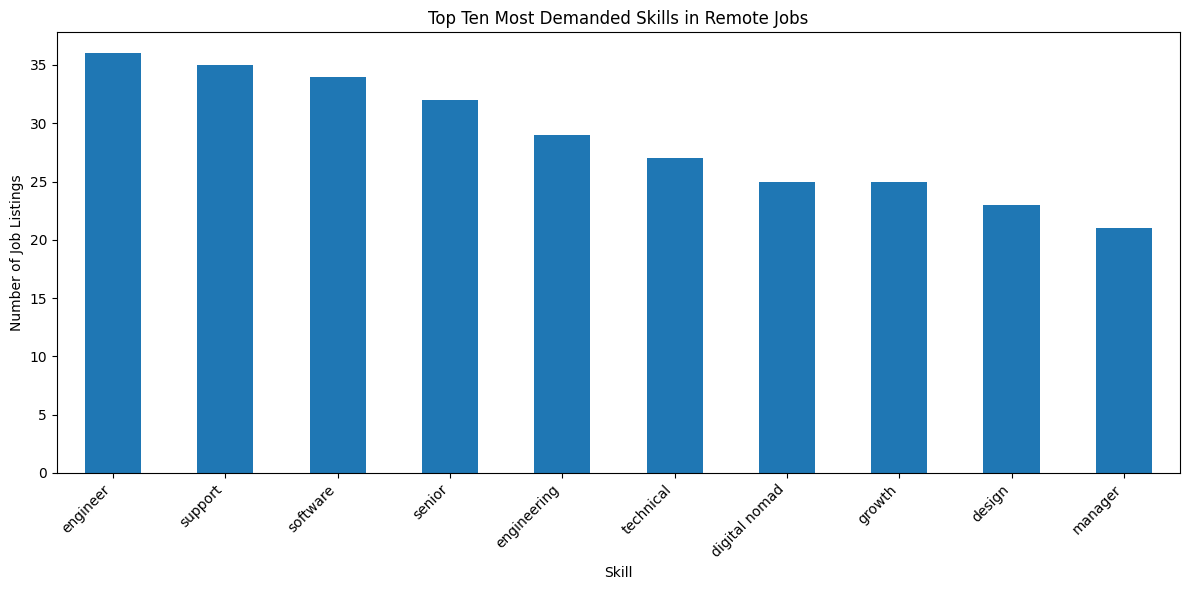

In [ ]:
skills_df = df.copy()
skills_df["skills"] = skills_df["skills"].str.split(", ")
skills_df = skills_df.explode("skills")

top_skills = skills_df["skills"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_skills.plot(kind="bar")
plt.title("Top Ten Most Demanded Skills in Remote Jobs")
plt.xlabel("Skill")
plt.ylabel("Number of Job Listings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig("visualizations/top_skills.png", dpi=300)
plt.show()

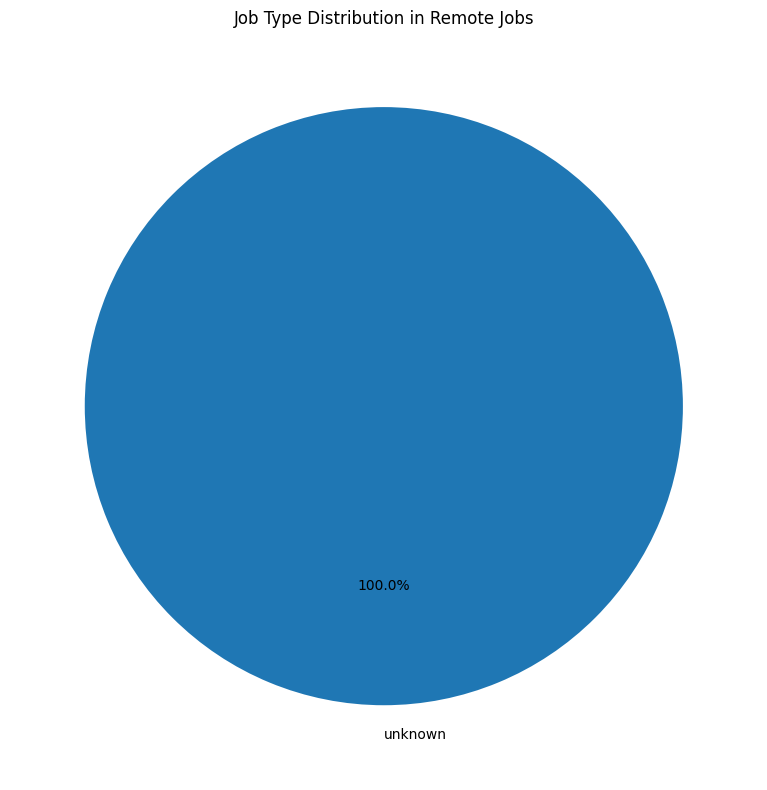

In [ ]:
job_type_counts = df["job_type"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    job_type_counts,
    labels=job_type_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Job Type Distribution in Remote Jobs")
plt.tight_layout()

plt.savefig("visualizations/job_type_distribution.png", dpi=300)
plt.show()

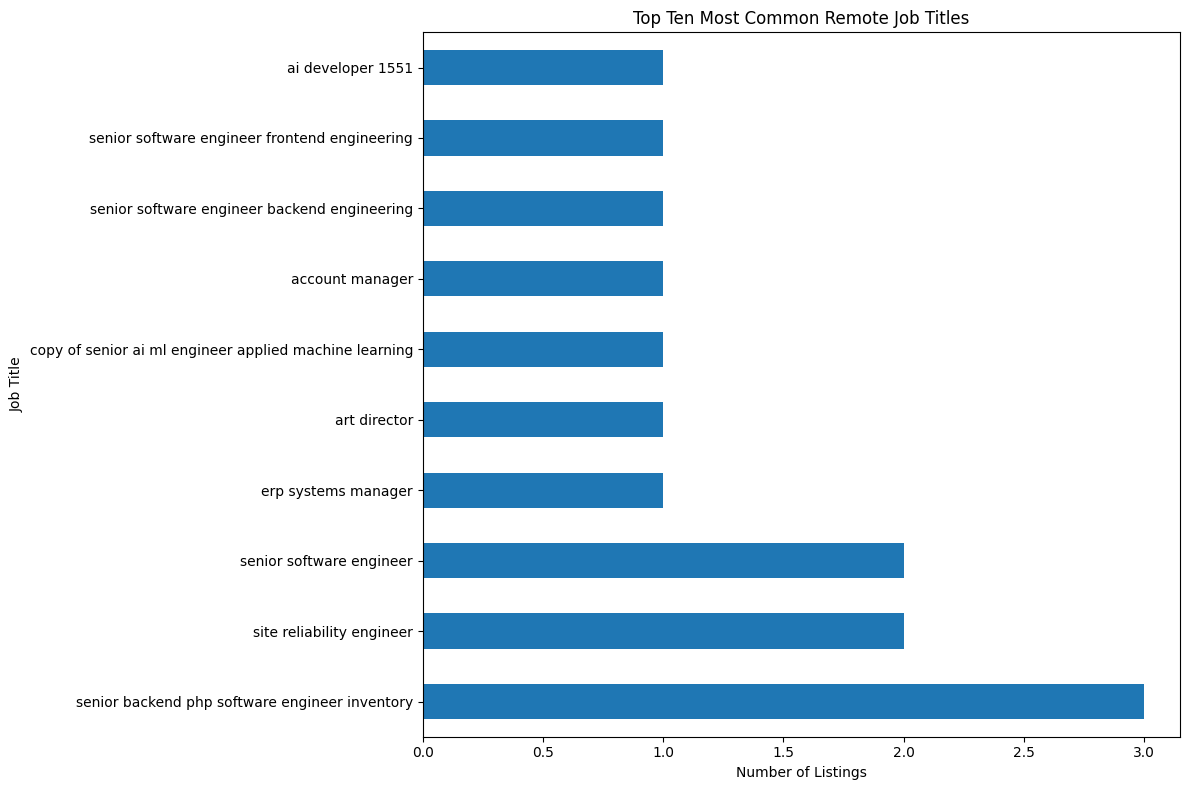

In [ ]:
top_titles = df["job_title"].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_titles.plot(kind="barh")
plt.title("Top Ten Most Common Remote Job Titles")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()

plt.savefig("visualizations/top_job_titles.png", dpi=300)
plt.show()

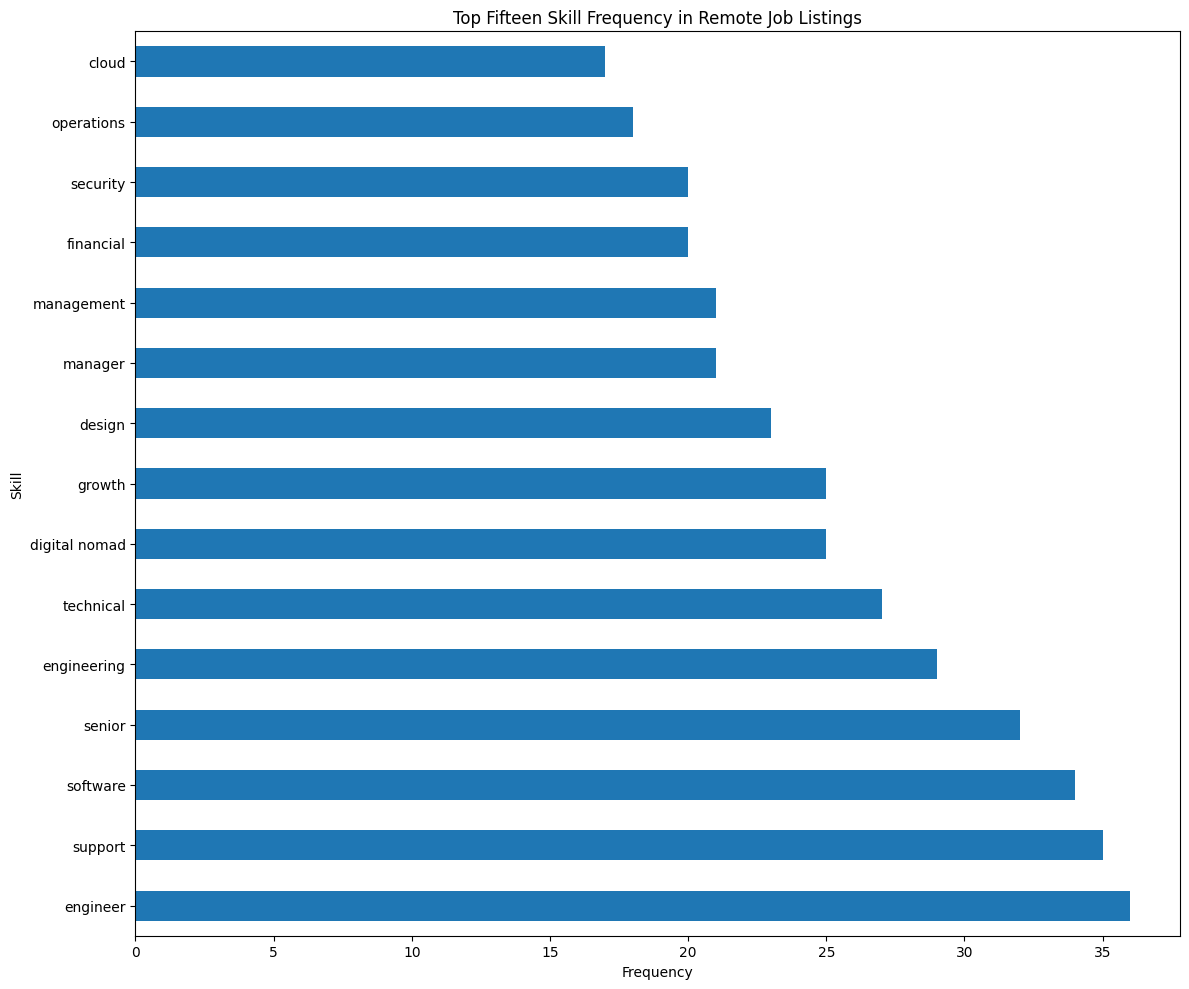

In [ ]:
top_skills_extended = skills_df["skills"].value_counts().head(15)

plt.figure(figsize=(12, 10))
top_skills_extended.plot(kind="barh")
plt.title("Top Fifteen Skill Frequency in Remote Job Listings")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()

plt.savefig("visualizations/skill_frequency_comparison.png", dpi=300)
plt.show()

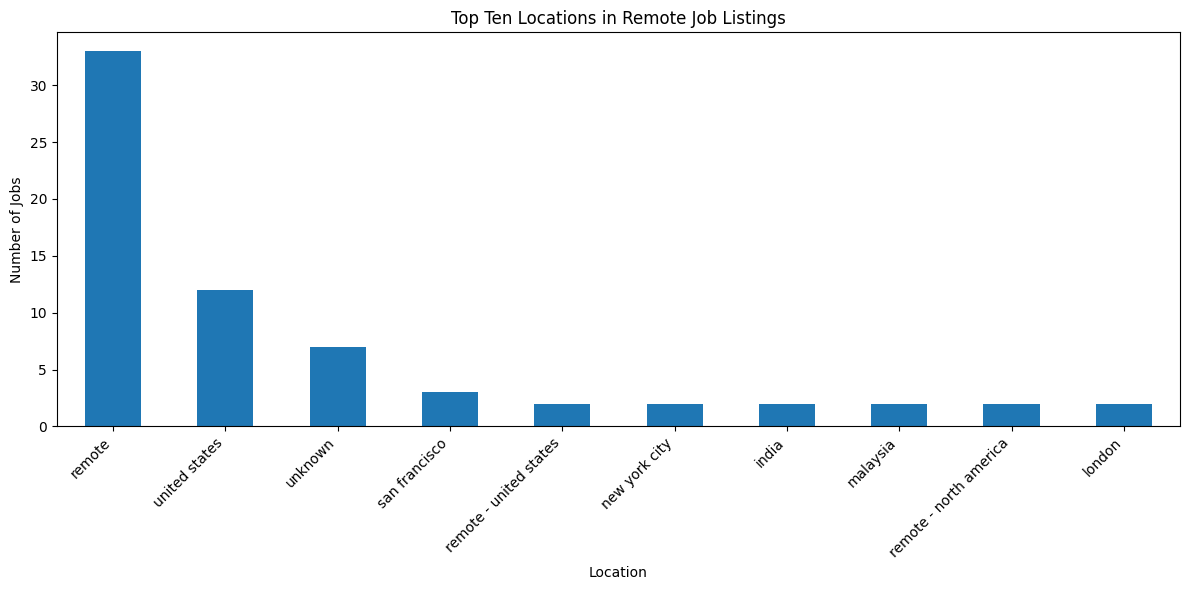

In [ ]:
top_locations = df["location"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_locations.plot(kind="bar")
plt.title("Top Ten Locations in Remote Job Listings")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig("visualizations/top_locations.png", dpi=300)
plt.show()